In [5]:
import numpy as np
import plateaumodules as pm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 

pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
pp = PdfPages(pD+'Fig2A.pdf')
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13"
      ][::-1]
agq=["Zongri-a","Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

mycombo=atib
mynames=mycombo[:]
mynames[mynames.index("Zongri-a")]="ZongriM297"
mynames[mynames.index("Zongri-b")]="ZongriM1"
mynames[mynames.index("Lajigai-a")]="Lajigai3"
mynames[mynames.index("Daxiang0")]="Dazhuang0"
mynames[mynames.index("CaixiutangJ2-13")]="ChaxiutangJ2-13"
mynames[mynames.index("Hejiatai")]="Hejiatai1"

wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.025]*len(mycombo)
myxmax=[0.025]*len(mycombo)

fig = plt.figure(figsize=(11,10))
newfile=open(pD+"Fig2a_dat.txt",'w')
##EA vs Tibetan
newfile.write("EA vs Tibetan\n")
ax1=fig.add_subplot(1,3,1)
myind="Han"
varypop="Tibetan_ChamdoX"
ypops=mycombo
mytuples=[(0,3),(1,2)]
mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="East Asian Ancestry\n%s                       %s" % ("Plateau","Plains") #mypops2[1][0],mypops2[0])
mec="black"
for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_ylabel("Low or High group",fontsize=16,rotation=90)
ax1.set_yticklabels(mynames,fontsize=14)#,fontsize=12)

ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15) #weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.tick_params(length=2,labelsize=14)
ax1.set_xlabel("D",fontsize=14)



##East vs West Plateau
ax1=fig.add_subplot(1,3,2)
myind="Zongri-a"
varypop="Chokhopani" 
myxmin=[-0.055]*len(mycombo)
myxmax=[0.065]*len(mycombo)

mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="Plateau Ancestry\n%s                            %s" % ("West","East") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_title(mylabel,fontsize=15) #weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.tick_params(length=2,labelsize=14)
ax1.set_xlabel("D",fontsize=14)


##cEA
ax1=fig.add_subplot(1,3,3)
myxmin=[-0.025]*len(mycombo)
myxmax=[0.055]*len(mycombo)

myind="Zongri-a"
varypop="Han"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)" % (mypops2[2],mypops2[1],'EA',mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="Plains Ancestry\n%s                    %s" % ("None/Low","High") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15) #,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel("D",fontsize=14)
ax1.tick_params(length=2,labelsize=14)

fig.autofmt_xdate()
plt.tight_layout()
plt.subplots_adjust(wspace=0.15) 

pp.savefig(bbox_inches = "tight")
pp.close()
#plt.show()

In [6]:
import numpy as np
import plateaumodules as pm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 

pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
pp = PdfPages(pD+'Fig2A_reordered.pdf')
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "Lierbao0","Hedong4",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "YushuSGZ-1","CaixiutangJ2-13"
      ][::-1]
agq=["Zongri-a","Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

mycombo=atib
mynames=mycombo[:]
mynames[mynames.index("Zongri-a")]="ZongriM297"
mynames[mynames.index("Zongri-b")]="ZongriM1"
mynames[mynames.index("Lajigai-a")]="Lajigai3"
mynames[mynames.index("Daxiang0")]="Dazhuang0"
mynames[mynames.index("CaixiutangJ2-13")]="ChaxiutangJ2-13"
mynames[mynames.index("Hejiatai")]="Hejiatai1"

wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.025]*len(mycombo)
myxmax=[0.025]*len(mycombo)

fig = plt.figure(figsize=(11,10))
newfile=open(pD+"Fig2a_dat.txt",'w')
##EA vs Tibetan
newfile.write("EA vs Tibetan\n")
ax1=fig.add_subplot(1,3,1)
myind="Han"
varypop="Tibetan_ChamdoX"
ypops=mycombo
mytuples=[(0,3),(1,2)]
mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="East Asian Ancestry\n%s                       %s" % ("Plateau","Plains") #mypops2[1][0],mypops2[0])
mec="black"
for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_ylabel("Low or High group",fontsize=16,rotation=90)
ax1.set_yticklabels(mynames,fontsize=14)#,fontsize=12)

ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15) #weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [1.5,4.5,8.5,11.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.tick_params(length=2,labelsize=14)
ax1.set_xlabel("D",fontsize=14)



##East vs West Plateau
ax1=fig.add_subplot(1,3,2)
myind="Zongri-a"
varypop="Chokhopani" 
myxmin=[-0.055]*len(mycombo)
myxmax=[0.065]*len(mycombo)

mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="Plateau Ancestry\n%s                            %s" % ("West","East") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_title(mylabel,fontsize=15) #weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [1.5,4.5,8.5,11.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.tick_params(length=2,labelsize=14)
ax1.set_xlabel("D",fontsize=14)


##cEA
ax1=fig.add_subplot(1,3,3)
myxmin=[-0.025]*len(mycombo)
myxmax=[0.055]*len(mycombo)

myind="Zongri-a"
varypop="Han"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)" % (mypops2[2],mypops2[1],'EA',mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="Plains Ancestry\n%s                    %s" % ("None/Low","High") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15) #,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [1.5,4.5,8.5,11.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel("D",fontsize=14)
ax1.tick_params(length=2,labelsize=14)

fig.autofmt_xdate()
plt.tight_layout()
plt.subplots_adjust(wspace=0.15) 

pp.savefig(bbox_inches = "tight")
pp.close()
#plt.show()

EA_Ancestry CaixiutangJ2-13 -0.0111 0.00230817217716781
EA_Ancestry YushuSGZ-1 -0.0092 0.002380952380952381
EA_Ancestry Hedong4 0.015 0.003157894736842105
EA_Ancestry Lierbao0 0.0078 0.002386780905752754
EA_Ancestry Samdzong -0.0109 0.0019746376811594205
EA_Ancestry Mebrak -0.0083 0.0024016203703703704
EA_Ancestry Chokhopani -0.0048 0.002365697387875801
EA_Ancestry XiaoendaM2 -0.0093 0.002540289538377492
EA_Ancestry XiaoendaM1 -0.0051 0.0029530978575564564
EA_Ancestry RedilongM3 -0.0129 0.0023726319661578074
EA_Ancestry Butaxiongqu -0.0099 0.0023163313055685544
EA_Ancestry PukagongmaM5 -0.0118 0.00246965257429887
EA_Ancestry PukagongmaM3 -0.008 0.0031007751937984496
EA_Ancestry PukagongmaM1 -0.0074 0.002731635289774825
EA_Ancestry QijiapingM104-2 0.0149 0.0025378981434167943
EA_Ancestry QijiapingM108-2 0.006 0.0027649769585253456
EA_Ancestry QijiapingM89-2 -0.0034 0.0027221777421937545
EA_Ancestry Wenpuju03 0.0063 0.0030627126883811377
EA_Ancestry Jinchankou0 0.004 0.002373887240356083

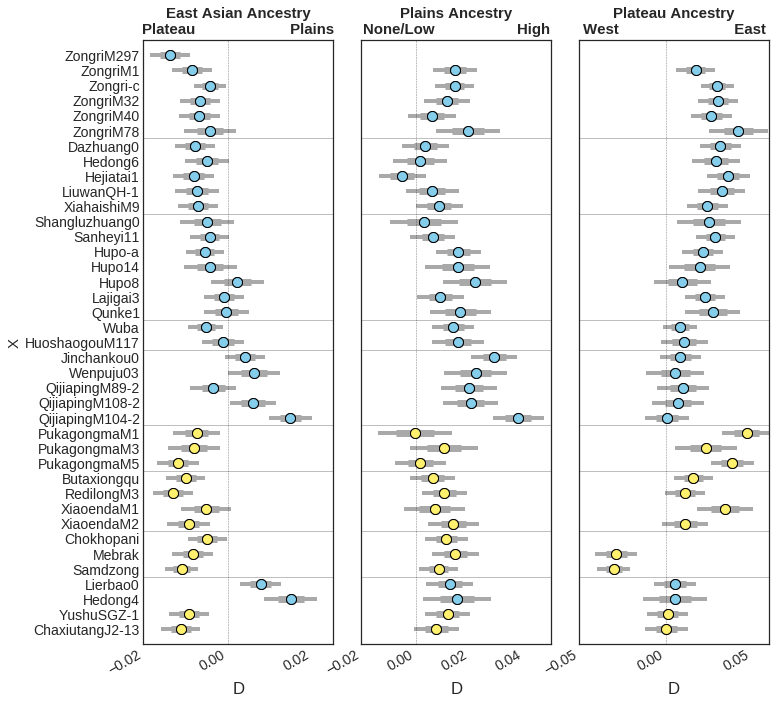

In [1]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 

pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13"
      ][::-1]
agq=["Zongri-a","Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

mycombo=atib
mynames=mycombo[:]
mynames[mynames.index("Zongri-a")]="ZongriM297"
mynames[mynames.index("Zongri-b")]="ZongriM1"
mynames[mynames.index("Lajigai-a")]="Lajigai3"
mynames[mynames.index("Daxiang0")]="Dazhuang0"
mynames[mynames.index("CaixiutangJ2-13")]="ChaxiutangJ2-13"
mynames[mynames.index("Hejiatai")]="Hejiatai1"

wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.025]*len(mycombo)

fig = plt.figure(figsize=(11,10))
newfile=open(pD+"Fig2a_dat.txt",'w')
##EA vs Tibetan
newfile.write("EA vs Tibetan\n")
ax1=fig.add_subplot(1,3,1)
myind="Han"
varypop="Tibetan_ChamdoX"
ypops=mycombo
mytuples=[(0,3),(1,2)]
mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="East Asian Ancestry\n%s                       %s" % ("Plateau","Plains") #mypops2[1][0],mypops2[0])
mec="black"
for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "EA_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_ylabel("X",fontsize=15,rotation=90)
ax1.set_yticklabels(mynames)#,fontsize=12)

ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in :
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel("D") #,fontsize=13)

##cEA
ax1=fig.add_subplot(1,3,2)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.05]*len(mycombo)

myind="Zongri-a"
varypop="Han"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)" % (mypops2[2],mypops2[1],'EA',mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="Plains Ancestry\n%s                    %s" % ("None/Low","High") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plains_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel("D") #,fontsize=13)

##East vs West Plateau
ax1=fig.add_subplot(1,3,3)
myind="Zongri-a"
varypop="Chokhopani" 
myxmin=[-0.05]*len(mycombo)
myxmax=[0.06]*len(mycombo)

mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="Plateau Ancestry\n%s                            %s" % ("West","East") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plateau_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_title(mylabel,fontsize=15)# ,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel("D") #,fontsize=13)

fig.autofmt_xdate()
plt.tight_layout()
plt.subplots_adjust(wspace=0.15) 
plt.show()

EA_Ancestry Samdzong -0.0109 0.0019746376811594205
EA_Ancestry Mebrak -0.0083 0.0024016203703703704
EA_Ancestry Chokhopani -0.0048 0.002365697387875801
EA_Ancestry CaixiutangJ2-13 -0.0111 0.00230817217716781
EA_Ancestry Butaxiongqu -0.0099 0.0023163313055685544
EA_Ancestry XiaoendaM2 -0.0093 0.002540289538377492
EA_Ancestry XiaoendaM1 -0.0051 0.0029530978575564564
EA_Ancestry RedilongM3 -0.0129 0.0023726319661578074
EA_Ancestry YushuSGZ-1 -0.0092 0.002380952380952381
EA_Ancestry PukagongmaM3 -0.008 0.0031007751937984496
EA_Ancestry PukagongmaM5 -0.0118 0.00246965257429887
EA_Ancestry PukagongmaM1 -0.0074 0.002731635289774825
EA_Ancestry Sherpa_ShigatseX -0.0104 0.0017232808616404307
EA_Ancestry Sherpa -0.0092 0.001991773111063001
EA_Ancestry Tibetan -0.0066 0.0019247594050743658
EA_Ancestry Tibetan_ShigatseX -0.0124 0.0016024812613078313
EA_Ancestry Tibetan_ShannanX -0.0125 0.0016821423765307497
EA_Ancestry Tibetan_LhasaX -0.0119 0.0018547381546134664
EA_Ancestry Tibetan_NagquX -0.012 

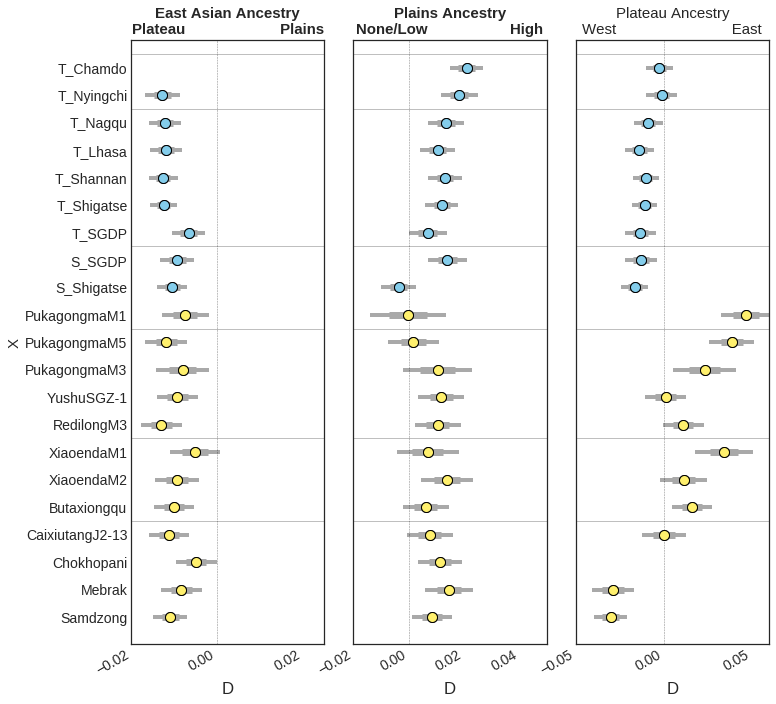

In [3]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 

pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13"
      ][::-1]
agq=["Zongri-a","Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]
pdtib=["Sherpa_ShigatseX","Sherpa","Tibetan","Tibetan_ShigatseX","Tibetan_ShannanX","Tibetan_LhasaX",
       "Tibetan_NagquX","Tibetan_NyingchiX","Tibetan_ChamdoX"]
mycombo=anx+pdtib
mynames=mycombo[:]
mynames[mynames.index("Tibetan_ShigatseX")]="T_Shigatse"
mynames[mynames.index("Tibetan_ShannanX")]="T_Shannan"
mynames[mynames.index("Tibetan_LhasaX")]="T_Lhasa"
mynames[mynames.index("Tibetan_NagquX")]="T_Nagqu"
mynames[mynames.index("Tibetan_NyingchiX")]="T_Nyingchi"
mynames[mynames.index("Tibetan_ChamdoX")]="T_Chamdo"
mynames[mynames.index("Sherpa_ShigatseX")]="S_Shigatse"
mynames[mynames.index("Sherpa")]="S_SGDP"
mynames[mynames.index("Tibetan")]="T_SGDP"

wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.025]*len(mycombo)

fig = plt.figure(figsize=(11,10))
newfile=open(pD+"Fig2a_dat.txt",'w')
##EA vs Tibetan
newfile.write("EA vs Tibetan\n")
ax1=fig.add_subplot(1,3,1)
myind="Han"
varypop="Tibetan_ChamdoX"
ypops=mycombo
mytuples=[(0,3),(1,2)]
mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="East Asian Ancestry\n%s                       %s" % ("Plateau","Plains") #mypops2[1][0],mypops2[0])
mec="black"
for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "EA_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_ylabel("X",fontsize=15,rotation=90)
ax1.set_yticklabels(mynames)#,fontsize=12)

ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel("D") #,fontsize=13)

##cEA
ax1=fig.add_subplot(1,3,2)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.05]*len(mycombo)

myind="Zongri-a"
varypop="Han"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)" % (mypops2[2],mypops2[1],'EA',mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="Plains Ancestry\n%s                    %s" % ("None/Low","High") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plains_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel("D") #,fontsize=13)

##East vs West Plateau
ax1=fig.add_subplot(1,3,3)
myind="Zongri-a"
varypop="Chokhopani" 
myxmin=[-0.05]*len(mycombo)
myxmax=[0.06]*len(mycombo)

mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
mylabel="Plateau Ancestry\n%s                            %s" % ("West","East") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plateau_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_title(mylabel,fontsize=15)# ,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel("D") #,fontsize=13)

fig.autofmt_xdate()
plt.tight_layout()
plt.subplots_adjust(wspace=0.15) 
plt.show()

ZongriM297 Samdzong 0.0092 0.0034782608695652175
ZongriM297 Mebrak 0.0076 0.004752970606629143
ZongriM297 Chokhopani 0.0034 0.004309252217997465
ZongriM297 YushuSGZ-1 0.0155 0.004521586931155192
ZongriM297 CaixiutangJ2-13 0.0159 0.004446308724832215
ZongriM297 Butaxiongqu 0.0218 0.004418321848398865
ZongriM297 XiaoendaM2 0.0276 0.0051627384960718295
ZongriM297 XiaoendaM1 0.0318 0.006330877961377664
ZongriM297 RedilongM3 0.0219 0.004595048258497692
ZongriM297 PukagongmaM5 0.0397 0.005056036678553234
ZongriM297 PukagongmaM3 0.0315 0.006989128023075217
ZongriM297 PukagongmaM1 0.0311 0.00560966810966811
ZongriM297 Sherpa_ShigatseX -0.0106 0.0025834755057275167
ZongriM297 Sherpa 0.0084 0.0032282859338970023
ZongriM297 Tibetan 0.0034 0.0032227488151658767
ZongriM297 Tibetan_ShigatseX 0.0081 0.002297872340425532
ZongriM297 Tibetan_ShannanX 0.008 0.002348796241926013
ZongriM297 Tibetan_LhasaX 0.0053 0.0028327097808658473
ZongriM297 Tibetan_NagquX 0.0091 0.0028095091077493055
ZongriM297 Tibetan

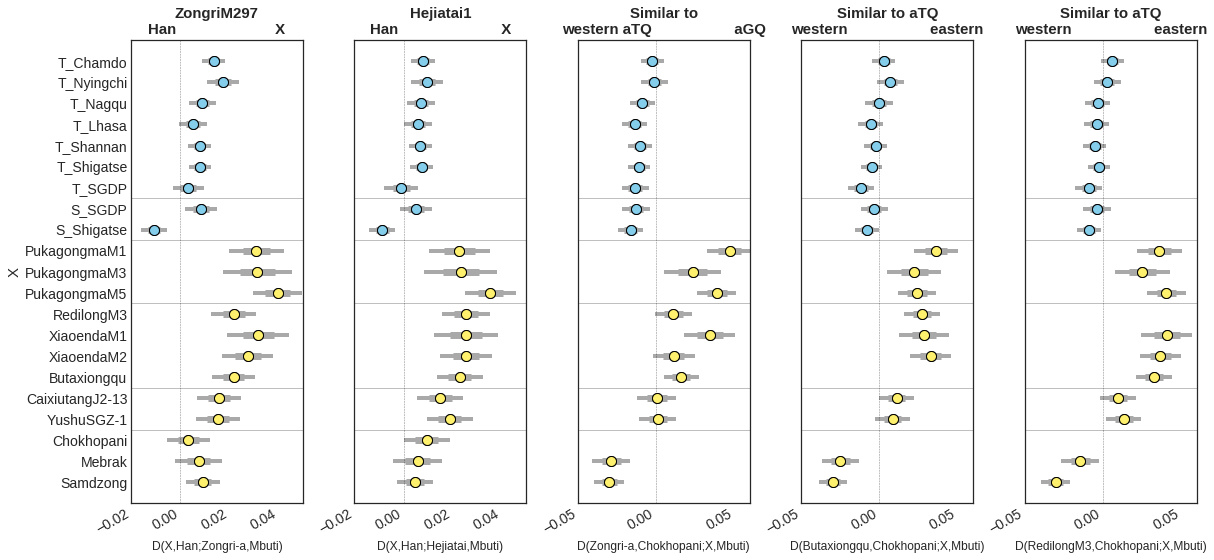

In [7]:


import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 

pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13"
      ][::-1]
agq=["Zongri-a","Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM3","PukagongmaM5",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu",
     "CaixiutangJ2-13","YushuSGZ-1","Chokhopani","Mebrak","Samdzong"][::-1]
pdtib=["Sherpa_ShigatseX","Sherpa","Tibetan","Tibetan_ShigatseX","Tibetan_ShannanX","Tibetan_LhasaX",
       "Tibetan_NagquX","Tibetan_NyingchiX","Tibetan_ChamdoX"]
mycombo=anx+pdtib
mynames=mycombo[:]
mynames[mynames.index("Tibetan_ShigatseX")]="T_Shigatse"
mynames[mynames.index("Tibetan_ShannanX")]="T_Shannan"
mynames[mynames.index("Tibetan_LhasaX")]="T_Lhasa"
mynames[mynames.index("Tibetan_NagquX")]="T_Nagqu"
mynames[mynames.index("Tibetan_NyingchiX")]="T_Nyingchi"
mynames[mynames.index("Tibetan_ChamdoX")]="T_Chamdo"
mynames[mynames.index("Sherpa_ShigatseX")]="S_Shigatse"
mynames[mynames.index("Sherpa")]="S_SGDP"
mynames[mynames.index("Tibetan")]="T_SGDP"

wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.025]*len(mycombo)
mec="black"
fig = plt.figure(figsize=(17,8))
newfile=open(pD+"Fig2a_dat.txt",'w')

##cEA
ax1=fig.add_subplot(1,5,1)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.05]*len(mycombo)

myind="Han"
varypop="Zongri-a"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % ('X',mypops2[1],mypops2[2][0],mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="ZongriM297\n%s                        %s" % ("Han","X") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "ZongriM297", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_ylabel("X",fontsize=15,rotation=90)
ax1.set_yticklabels(mynames)#,fontsize=12)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel(myxlabel,fontsize=12)


##cEA
ax1=fig.add_subplot(1,5,2)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.05]*len(mycombo)

myind="Han"
varypop="Hejiatai"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % ('X',mypops2[1],mypops2[2][0],mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="Hejiatai1\n%s                         %s" % ("Han","X") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Hejiatai", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel(myxlabel,fontsize=12)

##East vs West Plateau
ax1=fig.add_subplot(1,5,3)
myind="Zongri-a"
varypop="Chokhopani" 
myxmin=[-0.05]*len(mycombo)
myxmax=[0.06]*len(mycombo)

mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % (mypops2[0],mypops2[1][0],'X',mypops2[3]) #mypops2[1][0],mypops2[0])
mylabel="Similar to\n%s                    %s" % ("western aTQ","aGQ") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plateau_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_title(mylabel,fontsize=15 ,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel(myxlabel,fontsize=12)


##East vs West Plateau
ax1=fig.add_subplot(1,5,4)
myind="Butaxiongqu"
varypop="Chokhopani" 
myxmin=[-0.05]*len(mycombo)
myxmax=[0.06]*len(mycombo)

mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % (mypops2[0],mypops2[1][0],'X',mypops2[3]) #mypops2[1][0],mypops2[0])
mylabel="Similar to aTQ\n%s                    %s" % ("western","eastern") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plateau_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_title(mylabel,fontsize=15 ,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel(myxlabel,fontsize=12)

##East vs West Plateau
ax1=fig.add_subplot(1,5,5)
myind="RedilongM3"
varypop="Chokhopani" 
myxmin=[-0.05]*len(mycombo)
myxmax=[0.06]*len(mycombo)

mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % (mypops2[0],mypops2[1][0],'X',mypops2[3]) #mypops2[1][0],mypops2[0])
mylabel="Similar to aTQ\n%s                    %s" % ("western","eastern") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plateau_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_title(mylabel,fontsize=15 ,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel(myxlabel,fontsize=12)

fig.autofmt_xdate()
plt.tight_layout()
plt.subplots_adjust(wspace=0.3) 
plt.show()

Plateau_Ancestry Samdzong -0.03 0.004752098843655948
Plateau_Ancestry Mebrak -0.0287 0.006074074074074075
Plateau_Ancestry Chokhopani nan nan
Plateau_Ancestry YushuSGZ-1 0.0012 0.00594059405940594
Plateau_Ancestry CaixiutangJ2-13 0.0005 0.00625
Plateau_Ancestry Butaxiongqu 0.0162 0.00567624386825508
Plateau_Ancestry XiaoendaM2 0.0114 0.006678383128295255
Plateau_Ancestry XiaoendaM1 0.0345 0.008161816891412349
Plateau_Ancestry RedilongM3 0.0112 0.005797101449275362
Plateau_Ancestry PukagongmaM5 0.0388 0.006354405502784147
Plateau_Ancestry PukagongmaM3 0.0234 0.009006928406466514
Plateau_Ancestry PukagongmaM1 0.0471 0.007295539033457249
Plateau_Ancestry Sherpa_ShigatseX -0.0163 0.003868976976026584
Plateau_Ancestry Sherpa -0.0127 0.004521181915272339
Plateau_Ancestry Tibetan -0.0132 0.004414715719063544
Plateau_Ancestry Tibetan_ShigatseX -0.0107 0.0035869929601072743
Plateau_Ancestry Tibetan_ShannanX -0.0101 0.0037449017426770485
Plateau_Ancestry Tibetan_LhasaX -0.0137 0.0041030248577418

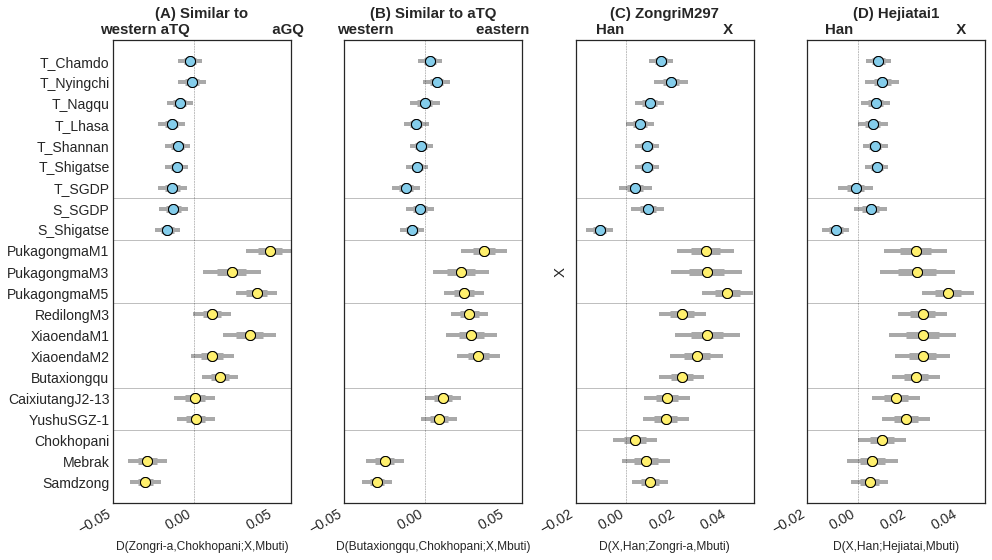

In [3]:


import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 

pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13"
      ][::-1]
agq=["Zongri-a","Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM3","PukagongmaM5",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu",
     "CaixiutangJ2-13","YushuSGZ-1","Chokhopani","Mebrak","Samdzong"][::-1]
pdtib=["Sherpa_ShigatseX","Sherpa","Tibetan","Tibetan_ShigatseX","Tibetan_ShannanX","Tibetan_LhasaX",
       "Tibetan_NagquX","Tibetan_NyingchiX","Tibetan_ChamdoX"]
mycombo=anx+pdtib
mynames=mycombo[:]
mynames[mynames.index("Tibetan_ShigatseX")]="T_Shigatse"
mynames[mynames.index("Tibetan_ShannanX")]="T_Shannan"
mynames[mynames.index("Tibetan_LhasaX")]="T_Lhasa"
mynames[mynames.index("Tibetan_NagquX")]="T_Nagqu"
mynames[mynames.index("Tibetan_NyingchiX")]="T_Nyingchi"
mynames[mynames.index("Tibetan_ChamdoX")]="T_Chamdo"
mynames[mynames.index("Sherpa_ShigatseX")]="S_Shigatse"
mynames[mynames.index("Sherpa")]="S_SGDP"
mynames[mynames.index("Tibetan")]="T_SGDP"

wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.025]*len(mycombo)
mec="black"
fig = plt.figure(figsize=(14,8))
newfile=open(pD+"Fig2a_dat.txt",'w')



##East vs West Plateau
ax1=fig.add_subplot(1,4,1)
myind="Zongri-a"
varypop="Chokhopani" 
myxmin=[-0.05]*len(mycombo)
myxmax=[0.06]*len(mycombo)

ypops=mycombo
mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % (mypops2[0],mypops2[1][0],'X',mypops2[3]) #mypops2[1][0],mypops2[0])
mylabel="(A) Similar to\n%s                    %s" % ("western aTQ","aGQ") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plateau_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(mynames)#,fontsize=12)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15 ,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel(myxlabel,fontsize=12)


##East vs West Plateau
ax1=fig.add_subplot(1,4,2)
myind="Butaxiongqu"
varypop="Chokhopani" 
myxmin=[-0.05]*len(mycombo)
myxmax=[0.06]*len(mycombo)

ypops=mycombo
mytuples=[(0,3),(1,2)]

mypops2=[myind,[varypop],ypops,out]

Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % (mypops2[0],mypops2[1][0],'X',mypops2[3]) #mypops2[1][0],mypops2[0])
mylabel="(B) Similar to aTQ\n%s                    %s" % ("western","eastern") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Plateau_Ancestry", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15 ,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)

ax1.set_xlabel(myxlabel,fontsize=12)

##cEA
ax1=fig.add_subplot(1,4,3)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.05]*len(mycombo)

myind="Han"
varypop="Zongri-a"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % ('X',mypops2[1],mypops2[2][0],mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="(C) ZongriM297\n%s                        %s" % ("Han","X") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "ZongriM297", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_ylabel("X",fontsize=15,rotation=90)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel(myxlabel,fontsize=12)


##cEA
ax1=fig.add_subplot(1,4,4)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.05]*len(mycombo)

myind="Han"
varypop="Hejiatai"

ypops=mycombo
mytuples=[(1,3),(0,2)]

mypops2=[ypops,myind,[varypop],out]

Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
SEaryall=Daryall/Zaryall 
mynewpops2=mypops2[:-1]+[out2]
Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
SEarytv=Darytv/Zarytv

myxlabel="D(%s,%s;%s,%s)" % ('X',mypops2[1],mypops2[2][0],mypops2[3])
mylabel="P3 = %s" % mypops2[2][0]
mylabel="(D) Hejiatai1\n%s                         %s" % ("Han","X") #mypops2[1][0],mypops2[0])

for ind,i in enumerate(ypops):
    if i in anx: wantedcolors="#fff06d" #"#fffacd" #"red"
    else: wantedcolors="#84cdeb"#"#c9e9f6" #"blue"
    #ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    #ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    #ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)
    print "Hejiatai", i, Daryall[0][ind], SEaryall[0][ind]
    ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
    ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor=mec,markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
    ax1.plot(Daryall[0][ind],ind,'.')
myys = np.array(range(len(mynames)))
ax1.set_yticks(myys)
ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
ax1.set_ylim(-1,len(mynames))
ax1.set_xlim(myxmin[0],myxmax[0])
xlabel = ax1.get_xticks().tolist()
ax1.set_title(mylabel,fontsize=15,weight='bold')
ax1.axvline(x=0, ls='dashed', c='black',alpha=0.5,linewidth=0.5) #, backgroundcolor="white") 
for myline in [2.5,4.5,8.5,11.5,13.5]:
    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5,linewidth=0.5)
ax1.set_xlabel(myxlabel,fontsize=12)

fig.autofmt_xdate()
plt.tight_layout()
plt.subplots_adjust(wspace=0.3) 
plt.show()